# Bootstrap: Intuição sobre sua efetividade para inferência estatística

Este notebook tem como objetivo mostrar por meio de simulação que o método de bootstrap é capaz de estimar bem o erro padrão de uma estatística (como a média), mesmo sem termos acesso à população completa.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Definimos uma população conhecida para fins de simulação
# Neste caso, usamos uma distribuição normal com média 50 e desvio padrão 10
np.random.seed(42)  # Para reprodutibilidade
populacao = np.random.normal(loc=50, scale=10, size=100_000)

# Parâmetros reais da população
media_pop = np.mean(populacao)
dp_pop = np.std(populacao)

print(f"Média da população: {media_pop:.2f}")
print(f"Desvio padrão da população: {dp_pop:.2f}")

Média da população: 50.01
Desvio padrão da população: 10.01


In [2]:
# Função que simula o processo de amostragem e aplica o bootstrap
def simula_bootstrap(n_amostra=30, B=1000):
    amostra = np.random.choice(populacao, size=n_amostra, replace=False)
    media_amostra = np.mean(amostra)
    erro_padrao_real = dp_pop / np.sqrt(n_amostra)
    medias_bootstrap = [
        np.mean(np.random.choice(amostra, size=n_amostra, replace=True))
        for _ in range(B)
    ]
    erro_padrao_bootstrap = np.std(medias_bootstrap)
    return erro_padrao_real, erro_padrao_bootstrap

In [3]:
# Executamos a simulação repetidas vezes para comparar os erros padrões real e bootstrap
n_simulacoes = 1000
resultados = np.array([simula_bootstrap() for _ in range(n_simulacoes)])
erros_reais = resultados[:, 0]
erros_bootstrap = resultados[:, 1]
media_erro_real = np.mean(erros_reais)
media_erro_bootstrap = np.mean(erros_bootstrap)
print(f"Média do erro padrão real: {media_erro_real:.4f}")
print(f"Média do erro padrão bootstrap: {media_erro_bootstrap:.4f}")

Média do erro padrão real: 1.8274
Média do erro padrão bootstrap: 1.7835


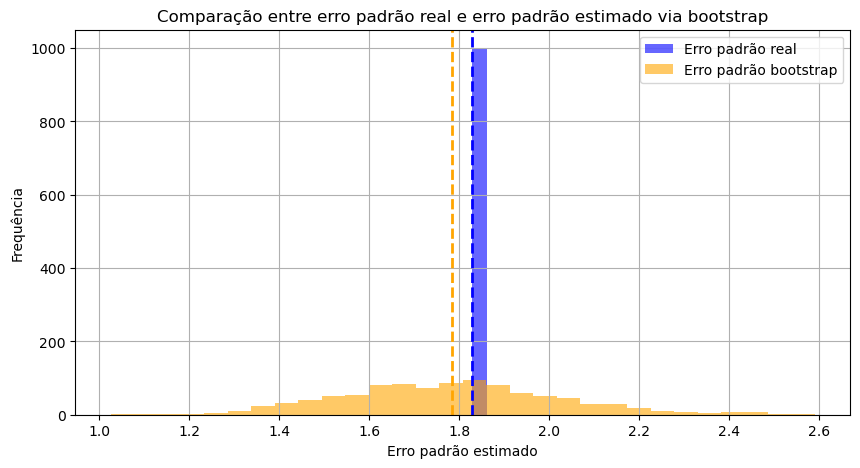

In [4]:
# Visualização: histogramas dos erros padrões obtidos
plt.figure(figsize=(10, 5))
plt.hist(erros_reais, bins=30, alpha=0.6, label="Erro padrão real", color='blue')
plt.hist(erros_bootstrap, bins=30, alpha=0.6, label="Erro padrão bootstrap", color='orange')
plt.axvline(media_erro_real, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(media_erro_bootstrap, color='orange', linestyle='dashed', linewidth=2)
plt.xlabel("Erro padrão estimado")
plt.ylabel("Frequência")
plt.title("Comparação entre erro padrão real e erro padrão estimado via bootstrap")
plt.legend()
plt.grid(True)
plt.show()

### Discussão

A simulação mostra que, mesmo quando temos apenas uma única amostra e desconhecemos a população,
o método bootstrap é capaz de estimar bem a variabilidade da média (ou de outra estatística).

Essa estimativa é obtida reamostrando com reposição da própria amostra e observando como a média varia.
O resultado aproxima bem o erro padrão real, que só seria acessível se conhecêssemos a população completa.

Portanto, o bootstrap fornece uma solução prática e eficiente para situações em que não temos acesso à população,
mas desejamos realizar inferência sobre parâmetros estatísticos.